In [13]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

DynamicOptimizer func + DynamicRate class

In [14]:
#*calculates dynamic optimizer based on loss and its size
@tf.function
def DynamicOptimizer(loss, size):
    while loss >= tf.pow(tf.cast(10.0, tf.float64), size):
        loss /= 10.0
    return loss

#*class for dynamic rate
class DynamicRate(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate):
        self.initial_learning_rate = initial_learning_rate
    def __call__(self, loss):
        loss_size = tf.cast(tf.size(loss), tf.float64)
        dynamic_change = DynamicOptimizer(tf.cast(loss, tf.float64), loss_size)
        return self.initial_learning_rate * dynamic_change

Test...

In [15]:
#*setting dynamic optimizer
DynamicDescent = keras.optimizers.Adam(learning_rate=DynamicRate(0.1))

#*some data for test
X = tf.cast(tf.linspace(0.0, 10.0, 100), tf.float64)
Y = X * 2

#*making one layer model
mdl = keras.Sequential([keras.layers.Dense(1, input_shape=[1])])
mdl.compile(optimizer=DynamicDescent, loss=keras.losses.MeanSquaredError())

#*training
EPOCHS = 10
stats = mdl.fit(X, Y, epochs=EPOCHS)

Epoch 1/10


c:\Users\Aleph\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131.6963  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.6464 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 45.3087
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 82.0157
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 56.2998
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.0826 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 1.8949
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 6.5606
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.9423 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 8.7962


As you can see it "jumps"...
Which is not ideal

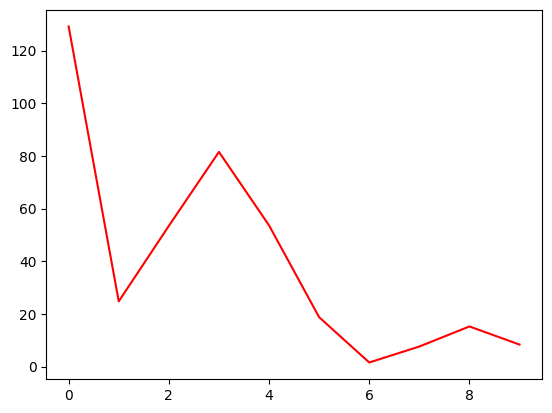

In [19]:
#*plot it
plt.plot(range(EPOCHS), stats.history["loss"], color="red")